In [1]:
# -*- coding: utf-8 -*-
import os, math, random, re, cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import shapely.wkt
from osgeo import gdal, ogr, osr
from shapely.geometry import Polygon, MultiPolygon, LineString, MultiLineString, Point, MultiPoint, LinearRing
from tqdm import tqdm_notebook
%matplotlib inline

In [2]:
def plot_image(image, cmap=plt.cm.gray, title=None):
    fig = plt.figure()
    plt.imshow(image, cmap=cmap)
    plt.axis("off")
    if title is not None:
        plt.title(title)
    plt.show()

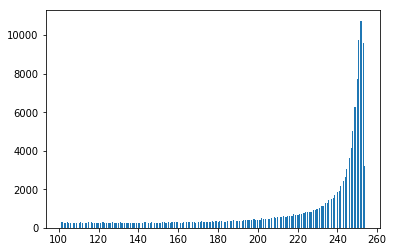

In [3]:
mask = plt.imread("/Users/mac/Desktop/111.tif")
tmp = mask.flatten()[mask.flatten()>100]
n, bins, patches = plt.hist(tmp, 256)

In [4]:
# threshold, mask = cv2.threshold(mask, 240, 256, cv2.THRESH_OTSU)
threshold, mask = cv2.threshold(mask, 200, 256, cv2.THRESH_BINARY)
kernel = np.ones((2, 2), np.uint8)
opend = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=5)
close = cv2.morphologyEx(opend, cv2.MORPH_CLOSE, kernel, iterations=5)

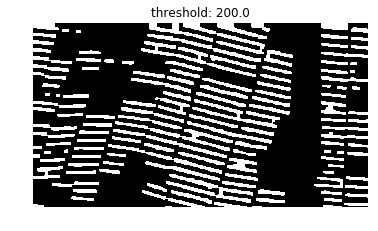

In [5]:
plot_image(close, title="threshold: {}".format(threshold))

In [6]:
_, contours, _ = cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
approx_contours = [cv2.approxPolyDP(cnt, 3, True) for cnt in contours]

In [15]:
contours[0]

array([[[538, 448]],

       [[537, 449]],

       [[537, 450]],

       [[579, 450]],

       [[563, 450]],

       [[562, 449]],

       [[550, 449]],

       [[549, 448]]], dtype=int32)

In [7]:
len(approx_contours)

132

In [8]:
polygons = []
linestrings = []
points = []
linerings = []
for cnt in approx_contours:
    assert cnt.shape[1] == 1
    if cnt.shape[0] > 2:
        poly = Polygon(shell=cnt[:, 0, :])
        if poly.is_valid:
            polygons.append(poly)
#         else:
#             point_list = list(poly.exterior.coords)
#             for i in range(len(point_list)-1):
#                 if i == len(point_list)-1:
#                     ls = LineString((point_list[i], point_list[0]))
#                 else:
#                     ls = LineString((point_list[i], point_list[i+1]))
#                 if ls.is_valid:
#                     linestrings.append(ls)
#                 else:
#                     print cnt[:, 0, :]
#     elif cnt.shape[0] > 1:
#         line = LineString(coordinates=cnt[:, 0, :])
#         linestrings.append(line)
#     else:
#         point = Point(cnt.reshape(2,))
#         points.append(point)
multi_polygon = MultiPolygon(polygons)
# multi_linestring = MultiLineString(linestrings)
# multi_point = MultiPoint(points)

# geometry_collection = multi_polygon.union(multi_linestring).union(multi_point)

# geometry_collection_wkt = shapely.wkt.dumps(geometry_collection)

multi_polygon_wkt = shapely.wkt.dumps(multi_polygon)

# ogr_gc = ogr.CreateGeometryFromWkt(geometry_collection_wkt)

In [9]:
with open("multi_polygon_wkt1.txt", "a+") as f:
    f.write(multi_polygon_wkt)

In [10]:
len(polygons)

125